In [3]:
from IPython.display import Image
from importlib import reload
from formlang import nfa
import graphics

# Формальные языки
Клячин Артемий, Б05-026

## Задание:
В задаче 23 аргументами являются строка в алфавите {a, b, c, 1, ., +, ∗}, являющаяся регулярным выражением в обратной польской записи, а также буква x и натуральное число k. Требуется вывести, есть ли в языке L слова, содержащие префикс $x^k$. Необходимо вывести YES в случае положительного ответа и NO — в случае отрицательного.

## Тесты из условия:
ab+c.aba.\*.bac.+.+\* a 2
Ответ: YES

acb..bab.c.\*.ab.ba.+.+\*a. b 3
Ответ: NO

## Решение:
На вход получаем строку являющуюся регулярным выражением в обратной польской записи. 
По регулярному выражению строим НКА (недетерминированный конечный автомат) с одним начальным состоянием.
Потом избавляемся от $\varepsilon$-переходов и недостижимых вершин и рёбер.

Далее начиная со стартовой вершины идём по автомату алгоритмом DFS, проверяя заданный префикс. Если префикс удалось найти (закончив в любом состоянии), то выводим ответ "YES", иначе "NO".


## Полное описание:
Была разработана библиотека formlang (Formal Languages). Основую библиотеки составляет
класс NFA, предназначенный для создания недетерминированного конечного автомата. С помощью него можно создать автомат, а также получать информация о графе переходов: стартовая вершина, терминальная вершина, списки рёбер выходящих из каждой вершины. Класс поддерживает операции: concatenate (конкатенация двух графов), unite (операция "+"), iterate (зацикливание графа, операция "\*").
Рассмотрим работу разработанной библиотеки formlang.nfa на примере следующего регулярного выражения в обратной польской записи
```
11.1+ab11.+1+*c..+*
```
Метод regex позвомяет увидеть распарсенное выражение в нормальной нотации.
Как мы увидим в дальнейшем, оно эквивалентно регулярному выражению ```(ab*c)*```.
Построим недетерминированный конечный автомат с помощью функции parseRPN и отобразим при помощи библиотеки GraphViz.
Серый кружок - это стартовая вершина (всегда 0). Двойной кружок - финальная вершина (всегда с наибольшим номеров), в неё всегда ведут $\varepsilon$-переходы.

regex: (||a(b||)*c)*


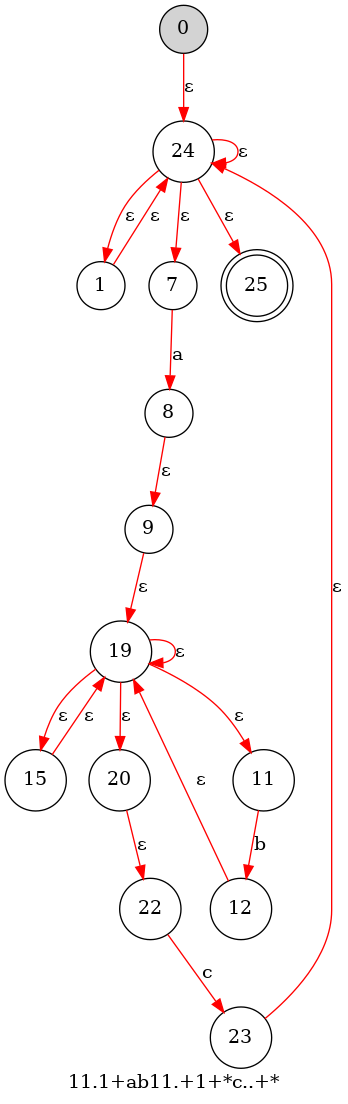

In [4]:
reload(nfa)
reload(graphics)

g = nfa.parseRPN("11.1+ab11.+1+*c..+*")
print('regex:', g.regex())
Image(graphics.nfaCreateImage(g))

При помощи метода condensate (поиск компонент сильной связности по $\varepsilon$-переходам) избавимся от циклов из $\varepsilon$-рёбер сжав их до одной вершины:

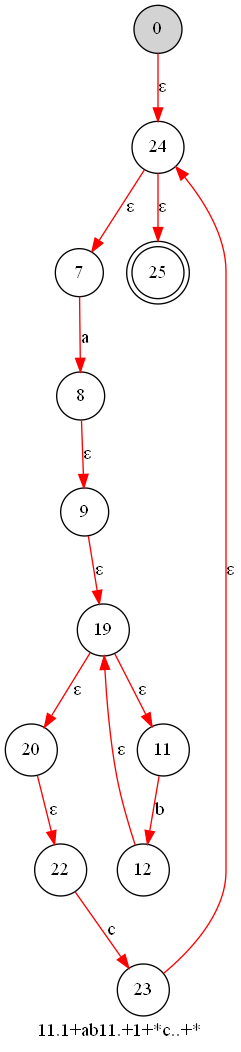

In [33]:
g.condensate()
Image(graphics.nfaCreateImage(g))

При помощи метода removeEpsilonEdges избавимся от $\varepsilon$-рёбер, добавив дополнительные рёбра с буквами. Символом \\$ обозначены $\varepsilon$-рёбра ведущие из терминальных вершин (из теперь много) в бывшую финальную. Это особенность реализованной библиотеки. Их можно не показывать, добавив дополнительный аргумент False в вызове nfaCreateImage. После этого серыми станут показываться терминальные вершины.

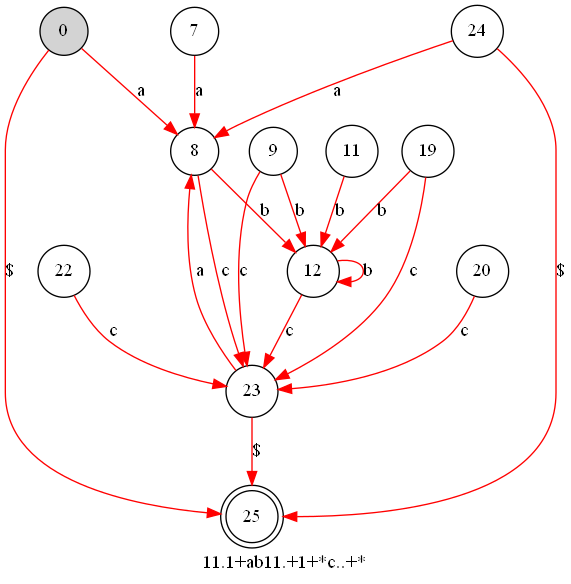

In [34]:
g.removeEpsilonEdges()
Image(graphics.nfaCreateImage(g))

Теперь появились вершины, в которые нельзя попась из стартовой. Метод removeUnreachableEdges позволяет избавиться от них. На этой картинке серым показаны терминальные вершины.

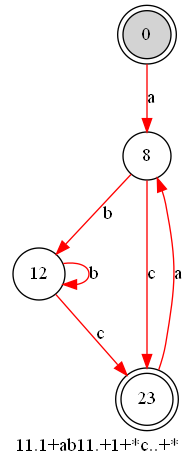

In [35]:
g.removeUnreachableEdges()
Image(graphics.nfaCreateImage(g, False))

Метод compact выкидывает из графа неиспользуемые вершины, перенумеровывая оставшиеся.

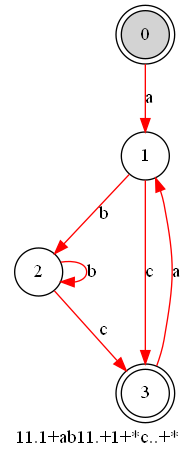

In [36]:
g.compact()
Image(graphics.nfaCreateImage(g, False))

НКА готов для поиска префиксов методом DFS или BFS. Пример работы библиотеки formlang для другого выражения ```ab+c.aba.*.bac.+.+*``` (первый тест для задачи №23). Префикс ```aa``` может быть найден по пути 0-4-8.

POSIX regex: ((a|b)c|a(ba)*(b|ac))*
NFA(rpn:ab+c.aba.*.bac.+.+* regex:((a|b)c|a(ba)*(b|ac))* rp:1 start:0 finish:10, G:[{'a': {1, 4}, '$': {10}, 'b': {2}}, {'c': {3}}, {'c': {3}}, {'a': {1, 4}, '$': {10}, 'b': {2}}, {'b': {5, 7}, 'a': {8}}, {'a': {6}}, {'b': {5, 7}, 'a': {8}}, {'a': {1, 4}, '$': {10}, 'b': {2}}, {'c': {9}}, {'a': {1, 4}, '$': {10}, 'b': {2}}, {}])


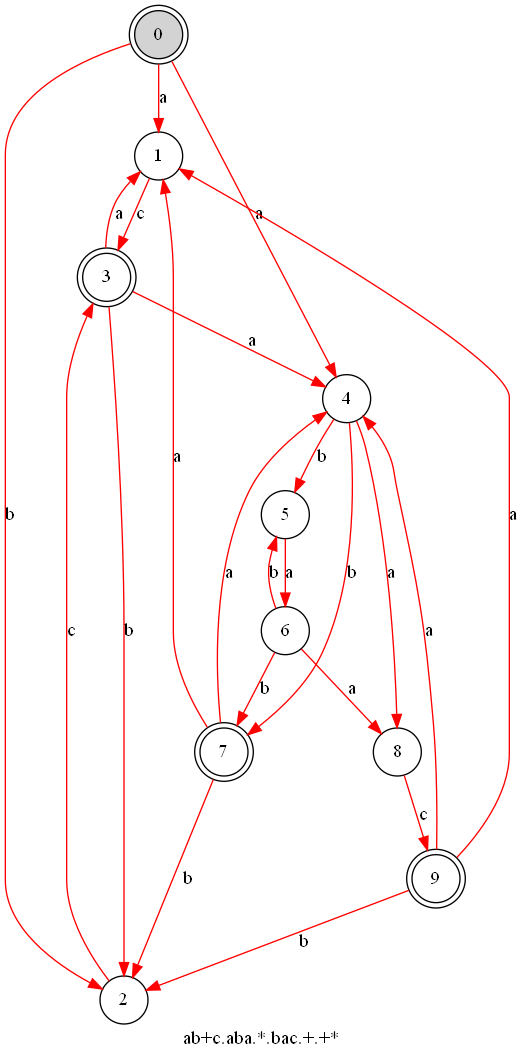

In [37]:
g = nfa.parseRPN("ab+c.aba.*.bac.+.+*")
print('POSIX regex:', g.regex())
g.condensate()
g.removeEpsilonEdges()
g.removeUnreachableEdges()
g.compact()
print(g)
Image(graphics.nfaCreateImage(g, False))

Проверка покрытия тестами при помощи пакетов pytest и pytest-cov

In [ ]:
!pytest --cov=formlang tests

============================= test session starts =============================
platform win32 -- Python 3.10.0, pytest-6.2.5, py-1.10.0, pluggy-1.0.0
rootdir: C:\mobile\Python\nfa
plugins: anyio-3.3.4, cov-3.0.0
collected 8 items

tests\test_dfa.py .                                                      [ 12%]
tests\test_helpers.py ...                                                [ 50%]
tests\test_nfa.py ...                                                    [ 87%]
tests\test_prefix.py .                                                   [100%]

---------- coverage: platform win32, python 3.10.0-final-0 -----------
Name                   Stmts   Miss  Cover
------------------------------------------
formlang\__init__.py       0      0   100%
formlang\dfa.py           44      0   100%
formlang\helpers.py       58      0   100%
formlang\nfa.py          161      3    98%
formlang\prefix.py        22      0   100%
------------------------------------------
TOTAL                    285    